In [60]:
import os
os.chdir("..")  # Moves one directory up

In [61]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from utils.config import base_path
import matplotlib.pyplot as plt
import seaborn as sns

## Gene Expression Exploration

In [62]:
df = pd.read_csv(base_path/ "gene_expression.csv")
df.head()

,ID_REF,GSM381194,GSM381195,GSM381196,GSM381197,GSM381198,GSM381199,GSM381200,GSM381201,GSM381202,...,GSM381270,GSM381271,GSM381272,GSM381273,GSM381274,GSM381275,GSM381276,GSM381277,GSM381278,GSM381279
0,1007_s_at,2.377898,2.378662,2.382631,2.378621,2.461926,3.290609,2.536218,2.377062,2.456681,...,2.380056,2.615649,2.377875,2.376057,2.702890,2.381181,2.474380,2.389282,2.375837,2.438526
1,1053_at,7.109049,5.156438,5.321988,5.195298,5.980662,6.352822,5.314602,5.440205,5.148019,...,5.693693,5.226776,5.352625,5.136478,6.135809,6.828485,5.215068,5.171455,5.582465,6.478445
2,117_at,9.630326,8.871972,8.348816,9.557484,8.807910,9.133817,8.716893,8.810138,8.196032,...,9.045299,8.207536,8.773177,8.635889,8.638233,8.829302,8.988185,8.082524,8.350547,9.403558
3,121_at,2.331110,2.337406,2.334704,2.643543,2.334267,2.337572,2.342447,2.339926,2.338847,...,2.339649,2.418437,2.349566,2.356812,2.343669,2.344477,2.332166,2.337505,2.329407,2.347640
4,1255_g_at,2.326892,2.325880,2.326533,2.330819,2.327032,2.328993,2.328094,2.329099,2.330408,...,2.331796,2.326758,2.330238,2.327100,2.331183,2.330042,2.324799,2.325841,2.325235,2.329681


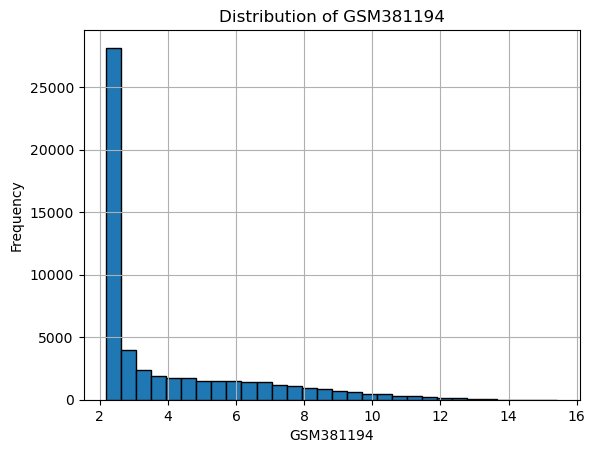

In [63]:
# Plot histogram
df['GSM381278'].hist(bins=30, edgecolor='black')

# Labels and Title
plt.xlabel('GSM381194')
plt.ylabel('Frequency')
plt.title('Distribution of GSM381194')

plt.show()

General look on one sample

In [64]:
df_transposed = df.set_index('ID_REF').T.reset_index()

# Rename columns - for future merging
df_transposed.rename(columns={'index': 'SampleID'}, inplace=True)


#### Exploring the distributions of different features

In [65]:
def plot_distribution(df, feature_name):  
    # Plot histogram
    df[feature_name].hist(bins=30, edgecolor='black')

    # Labels and Title
    plt.xlabel(f'{feature_name} Values')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_name}')

    plt.show()


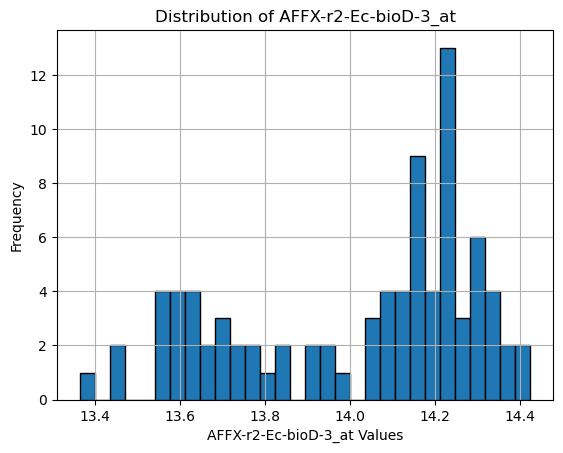

In [66]:
plot_distribution(df_transposed,'AFFX-r2-Ec-bioD-3_at')


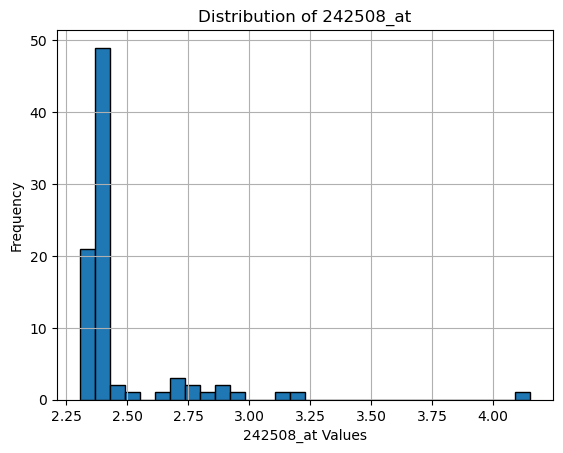

In [67]:
plot_distribution(df_transposed,'242508_at')

From the examples above, we can see that there is no strict type of distribution, and it varies with the gene sample.

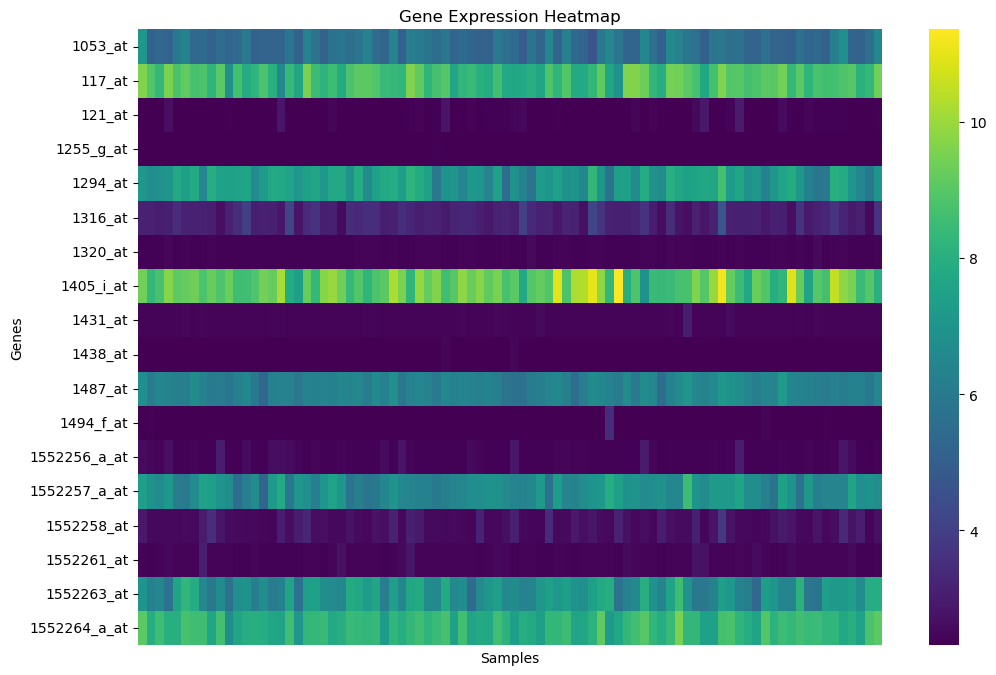

In [68]:
# Select a random subset of genes (due to large size)
subset_genes = df_transposed.columns[2:20]  # First 18 genes after SampleID
subset_df = df_transposed.set_index("SampleID")[subset_genes]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subset_df.T, cmap="viridis", xticklabels=False, yticklabels=True)
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.title("Gene Expression Heatmap")
plt.show()

In [69]:
df_transposed.head()

ID_REF,SampleID,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM381194,2.377898,7.109049,9.630326,2.331110,2.326892,7.145603,3.134364,2.374527,9.394731,...,14.064595,14.409486,15.340609,15.009971,2.343681,2.388518,2.389734,2.391520,2.372542,2.383567
1,GSM381195,2.378662,5.156438,8.871972,2.337406,2.325880,6.724430,3.132534,2.371931,8.343010,...,14.174693,14.373827,15.377683,15.105723,2.343602,2.386321,2.389150,2.388430,2.371702,2.383306
2,GSM381196,2.382631,5.321988,8.348816,2.334704,2.326533,6.856559,2.996339,2.373904,8.742820,...,14.213614,14.398713,15.384944,15.052003,2.344340,2.386788,2.389496,2.390634,2.373524,2.384077
3,GSM381197,2.378621,5.195298,9.557484,2.643543,2.330819,7.046044,3.092153,2.464753,9.732182,...,14.388486,14.605807,15.443017,15.128155,2.353103,2.392984,2.395262,2.399168,2.382912,2.396485
4,GSM381198,2.461926,5.980662,8.807910,2.334267,2.327032,7.758407,3.444969,2.375944,9.125310,...,13.807197,13.519561,14.916550,14.284186,2.345828,2.387339,2.389583,2.392193,2.373700,2.384135


In [70]:
# Find the feature with the largest value in the outlier features DataFrame
max_value = features.max().max()  # Get the absolute maximum value
feature_with_max_value = features.max().idxmax()  # Get the feature (column) with max value

# Display results
max_value, feature_with_max_value


(15.55954469, 'AFFX-r2-P1-cre-3_at')

In [71]:
# Find the feature with the largest value in the outlier features DataFrame
min_value = features.min().min()  # Get the absolute maximum value
feature_with_min_value = features.min().idxmin()  # Get the feature (column) with max value

# Display results
min_value, feature_with_min_value

(2.180641921, '1556748_x_at')

We can see that we don’t have very large or very small numbers.

#cheking number of nan values

In [72]:
total_nan_count = features.isna().sum().sum()
total_nan_count

0

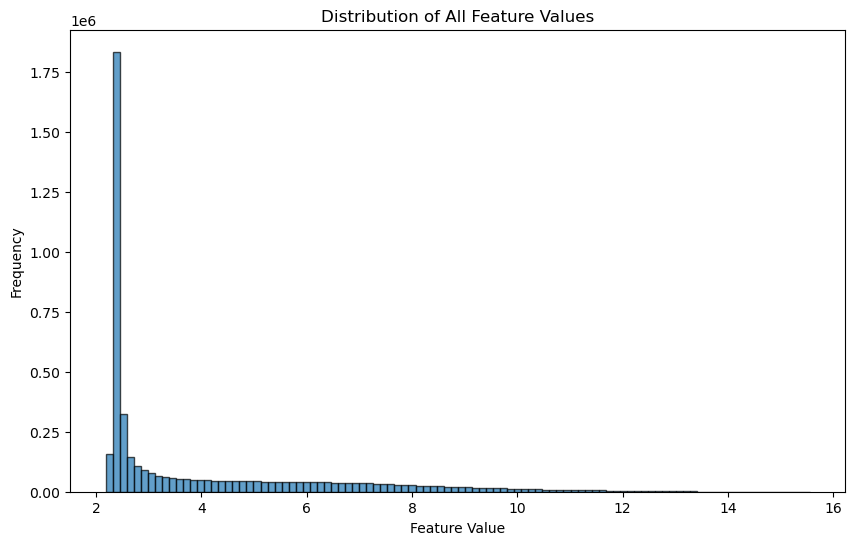

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten all values into a single array
all_values = features.values.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_values, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Distribution of All Feature Values")
# plt.yscale("log")  # Log scale to handle large value differences

# Show plot
plt.show()


In [74]:
df.ID_REF.nunique()

54675

## Meta Data Exploration

In [75]:
meta_data = pd.read_csv(base_path/ "meta_data.csv")
meta_data.head()

,SampleID,Tissue,disease state,protocol,disease activity score (das28),Response status,Gender
0,GSM381194,whole blood,rheumatoid arthritis,anti_TNF therapy,4.51,Responder,Male
1,GSM381195,whole blood,rheumatoid arthritis,anti_TNF therapy,6.04,Non_responder,Female
2,GSM381196,whole blood,rheumatoid arthritis,anti_TNF therapy,5.92,Non_responder,Male
3,GSM381197,whole blood,rheumatoid arthritis,anti_TNF therapy,4.48,NaN,Female
4,GSM381198,whole blood,rheumatoid arthritis,anti_TNF therapy,6.00,Non_responder,Female


In [76]:
meta_data['Response status'].value_counts(dropna=False)

Response status
NaN              40
Responder        24
Non_responder    22
Name: count, dtype: int64

We can see that almost half of the data is missing. However, the remaining samples are fairly balanced, which means that accuracy could be a good metric.  
As a result of the missing labels, we need to drop those columns.

In [77]:
#https://datascience.stackexchange.com/questions/12455/feature-selection-for-gene-expression-dataset

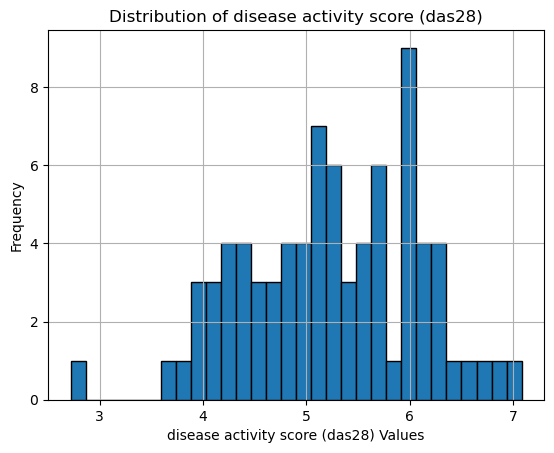

In [78]:
# Plot histogram
meta_data['disease activity score (das28)'].hist(bins=30, edgecolor='black')

# Labels and Title
plt.xlabel('disease activity score (das28) Values')
plt.ylabel('Frequency')
plt.title('Distribution of disease activity score (das28)')

# Show the plot
plt.show()

#exploratory part for future work

c:\Users\user\anaconda3\envs\test\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



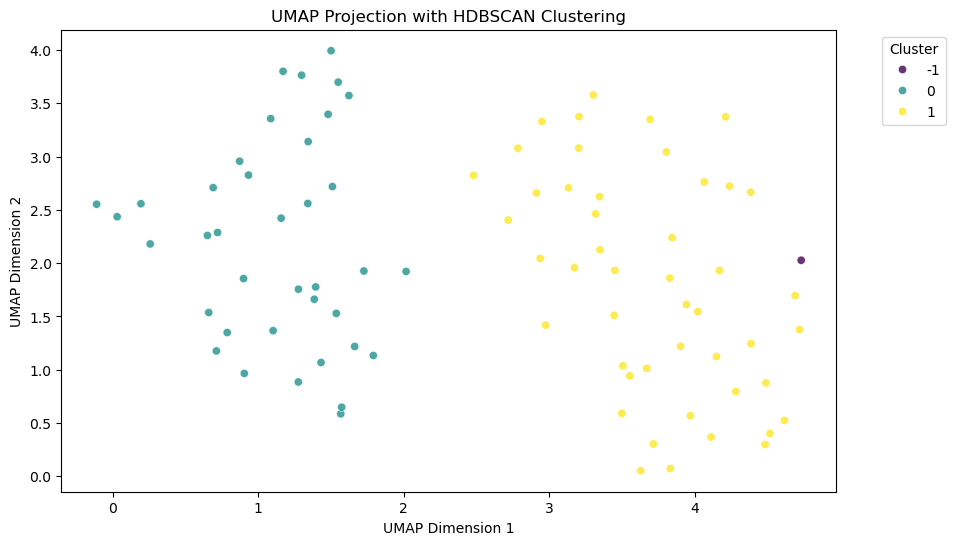

In [79]:
import pandas as pd
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Extracting sample IDs
sample_ids = df_transposed.iloc[:, 0]

# Selecting numeric features
features = df_transposed.iloc[:, 2:].astype(float)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply UMAP for dimensionality reduction (2D)
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = umap_reducer.fit_transform(features_scaled)

# Apply HDBSCAN for clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(embedding_2d)

# Convert labels to DataFrame
df_umap = pd.DataFrame(embedding_2d, columns=["UMAP1", "UMAP2"])
df_umap["Cluster"] = labels
df_umap["SampleID"] = sample_ids

# Visualize the UMAP clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_umap["UMAP1"], y=df_umap["UMAP2"], hue=df_umap["Cluster"], palette="viridis", alpha=0.8
)
plt.title("UMAP Projection with HDBSCAN Clustering")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

the umap projection speterate thr groups to 2 , i found it interesting

In [80]:
import hdbscan
import umap
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import plotly.io as pio

# TF-IDF Vectorization (Character-Level N-Grams)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
X_tfidf = vectorizer.fit_transform(df.ID_REF)

# Dimensionality Reduction (UMAP for better clustering performance)
reducer = umap.UMAP(n_components=2, random_state=42, metric='cosine')
X_umap = reducer.fit_transform(X_tfidf)

# Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=10, metric='euclidean', cluster_selection_method='eom')
df["Cluster"] = clusterer.fit_predict(X_umap)

# Create an Interactive Plotly Scatter Plot
fig = px.scatter(
    x=X_umap[:, 0],
    y=X_umap[:, 1],
    color=df["Cluster"].astype(str),
    title="HDBSCAN Clustering of Probe IDs (Interactive)",
    labels={"x": "UMAP Component 1", "y": "UMAP Component 2", "color": "Cluster"},
    opacity=0.6,
)

# Customize layout for better visualization
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    template="plotly_white",
    width=900,
    height=600,
    showlegend=True,
)

# Display interactive plot
pio.show(fig)


c:\Users\user\anaconda3\envs\test\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

